<a href="https://colab.research.google.com/github/ming80302/Innovator/blob/main/case_veri_innovator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!apt-get install -qq libgdal-dev libproj-dev

import datetime
import calendar
#from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
 

In [71]:
from google.colab import drive
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OBS data: ttps://mesowest.utah.edu/.  <br>
from 'Data API Services' download 'weather condition' data. <br>
KPDX.2021-02-18.csv, KHIO.2021-02-18.csv, KTTD.2021-02-18.csv <br>
From there, I got wc_KTTD, wc_KHIO and wc_KPDX

In [88]:
station = ['KPDX',      'KHIO',     'KTTD']
lat     = [45.59578,    45.54765,   45.55111]
lon     = [-122.60917, -122.95568, -122.40889]
wc_KTTD = ["light frz rain","light snow","light snow","light frz rain","light frz rain", "light rain","light rain"]
wc_KHIO = ["light snow","light snow","light snow,mist","light snow,mist","unknown precip,mist","light rain","light rain"]
wc_KPDX = ["light rain->light snow","light snow","light snow","light frz rain,light snow","light frz rain","light rain","light rain"]
lat = np.asarray(lat)
lon = np.asarray(lon)
stationdict  = {'KPDX':wc_KPDX,'KHIO':wc_KHIO ,'KTTD': wc_KTTD } 

In [89]:
dir_prism = '/content/drive/MyDrive/data/PRISM/'
date_st  = '2021-02-11'
date_end = '2021-02-17'
date_s = pd.date_range(date_st, date_end, freq='D').format(formatter=lambda x: x.strftime('%Y%m%d'))
data = {'date': date_s}
df = pd.DataFrame(data) 
 
ds = xr.open_dataset(dir_prism + 'PRISM_daily_tmin_2021.nc')

for nn in range(len(lat)):
  tmin_1d = ds.sel(time=slice(date_st, date_end)).sel(rlat=lat[nn], rlon=lon[nn], method = 'nearest').Tmin
  df[station[nn]+' prism Tmin']=tmin_1d
  df[station[nn]] = stationdict[station[nn]] 

df

,date,KPDX prism Tmin,KPDX,KHIO prism Tmin,KHIO,KTTD prism Tmin,KTTD
0,20210211,1.1164,light rain->light snow,0.2028,light snow,1.4159,light frz rain
1,20210212,-2.1862,light snow,-2.1104,light snow,-2.4279,light snow
2,20210213,-4.2773,light snow,-3.8460,"light snow,mist",-4.6868,light snow
3,20210214,-4.1643,"light frz rain,light snow",-4.0535,"light snow,mist",-4.6098,light frz rain
4,20210215,-2.4835,light frz rain,-1.9913,"unknown precip,mist",-2.9879,light frz rain
5,20210216,-1.0617,light rain,0.4745,light rain,-1.4049,light rain
6,20210217,2.9419,light rain,1.3782,light rain,3.2174,light rain


Plot OBS. location

In [83]:
flnm_shp = '/content/drive/MyDrive/data/SHAPEFILE/sovi_3county_SD/sovi_3_county.shp'
shp_gpd = gpd.read_file(flnm_shp)
 

In [90]:
# define coordinate reference system (CRS). 
crs={'init':'epsg:4326'}
# define the geometry
data = {'latitude': lat, 'longitude':lon}
geometry=[Point(xy) for xy in zip(data["longitude"], data["latitude"])]
geodata=gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


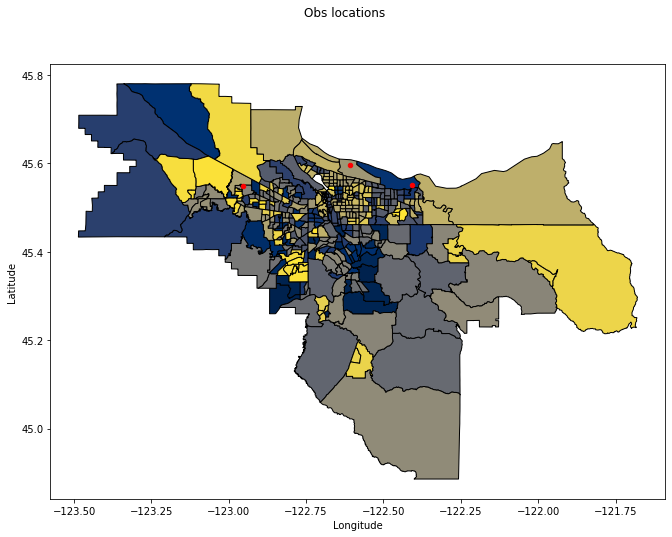

In [92]:
fig, ax = plt.subplots(figsize=(15, 8))
shp_gpd.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=1,cmap="cividis")
geodata.plot(ax=ax, color='red', markersize=20)
fig.suptitle('Obs locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium');